# Geometric Operations and Other Image Tools


## Objectives
In this part of the workshop, you will learn how to transform images using geometric transformations. This allows you to perform different operations to move, reshape and rotate an image. In the second part of the lab, you will learn how to implement a simple feature recognition algorithm. 

We will keep track of the changes you make using git and we will push the code to your own personal github repository.

### Start tracking changes

In the terminal (bottom panel), type:

> git init

This will create a hidden .git folder — Git will now track all your changes. Now you can define the branch of your repository that you will edit. 

> git branch -M main

> git remote add origin https://github.com/your-username/Digital-Skills.git

> git push -u origin main


Open the Source Control tab (icon on the left sidebar).

You should see your committed files.

Add your name to the top of this markdown cell and save the file.

In the terminal:

Stage the change

> git add . 

Commit the change

> git commit -m "Describe what changed"

Push

> git push

You should now see the new code in your github repository

Now we will look at using python for some image processing tasks.

Import the packages you will need by running the cell below.

You may need to install cv2 using the command *pip3 install opencv-python* in the terminal. 

*Open CV* is a computer vision library that is commonly used in scientific applications to manipulate, process and interpret images. It can also be used to support machine learning applications.

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

Below we define a helper function to plot two images side-by-side. You will not need to understand this code this moment, but this function will be used in this tutorial to showcase the results. 


In [ ]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

#  Geometric Transformations


 Geometric transformations allow you to perform different operations like translation i.e. to move, reshape and rotate an image.


## Scaling 


We can resize an image using the function `resize()` from `cv2` module for this purpose.  You can specify the scaling factor or the size of the image:


We will now generate a simple toy image.

Annotate the cell below with the following comments that describe what each line of code does (the comments are not in the correct order)
- Fill a 4×4 square in the center of the toy_image with maximum brightness (white) for a pixel in an 8-bit grayscale  image. The 8-bit grayscale range is 0 = black → 255 = white.
- Print a numerical array representating the image.
- Create a toy_image that is 6×6 array filled with zeros — this is your blank (black) image.
- Display the plot.
- Plot the image in grayscale.




In [ ]:
toy_image = np.zeros((6,6))
toy_image[1:5,1:5]=255
toy_image[2:4,2:4]=0
plt.imshow(toy_image,cmap='gray')
plt.show()
toy_image

We can rescale along a specific axis:

- `fx`: scale factor along the horizontal axis  
- `fy`: scale factor along the vertical axis


The interpolation setting decides how new pixel values are guessed when an image is resized.

INTER_NEAREST uses the value of the closest pixel and may produce a 'blocky' image.

INTER_CUBIC looks at several nearby pixels to make the image smoother.


We will use INTER_NEAREST first since we are dealing with a simple image.

In [ ]:
new_toy = cv2.resize(toy_image,None,fx=2, fy=1, interpolation = cv2.INTER_NEAREST )
plt.imshow(new_toy,cmap='gray')
plt.show()


In the cell below write a code snippet to scale the original toy image so that it is a 10 x 10 square and plot the scaled image.

In [ ]:
toy_10by10 = 

You can now commit this change to your github repository using the terminal:

> git add .

> git commit -m "Describe what changed"

> git push

Remember to do this when you add or change any code.

### Looking at real images

Consider the following image:

<img src="diffraction.png" height=200>

This is an X-ray diffraction image, to use these images to solve a 3D structure we need to process them and find the position and intensities of the reflections (or spots). The images are quite noisy which can cause problems when identifying the spot positions.

We will use the computer vision package to process this image in different ways.

First we will import it as 'image'


In [ ]:
image = cv2.imread("diffraction.png", cv2.IMREAD_GRAYSCALE) # We are importing this image as gray scale as we will use this later in the workshop.
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

We can scale the vertical axis by two.


In [ ]:
new_image = cv2.resize(image, None, fx=1, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

We can also shrink the image by setting the scaling factor to a real number between 0 and 1:


In [ ]:
new_image = cv2.resize(image, None, fx=1, fy=0.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

We can  also specify the number of rows and columns:


In [ ]:
rows = 500
cols = 500

In [ ]:
new_image = cv2.resize(image, (rows, cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

Now change the code above so that there are 500 rows and 500 columns, save the picture as 'diffraction_500.png' inside the current repository. You will notice it appears in the explorer menu on the left hand side of the screen.

<img src="new_image.png" height=200>

You should commit after this change.

You will need to use a slight different version of git add

> git add -A

This command adds all changes everywhere in the repo:
 
- new files (including the image you have jused saved)

- modified files

- deleted files

> git commit "Describe what you have done"

> git push



## Translation


Translation is  when you  shift the location of the image. <code>tx</code> is the number of pixels you shift the location in the horizontal direction and <code>ty</code> is the number of pixels you shift in the vertical direction. You can create the transformation matrix $M$ to shift the image. 


In this example, we shift an image 100 pixels horizontally.


<img src="molecule.png" height=200>

We can use different commands to change the oritentation of the image. 

In the code space below import 'molecule.png' as image2 using the cv2.imread command.

To preserve the colours don't use the grayscale command.

Is it time to commit again?

In [25]:
tx = 100
ty = 0
M = np.float32([[1, 0, tx], [0, 1, ty]])
M

array([[  1.,   0., 100.],
       [  0.,   1.,   0.]], dtype=float32)

The shape of the image is given by:


In [26]:
rows, cols, _ = image2.shape

We use the function <code>warpAffine</code> from the <code>cv2</code> module. The first input parater is an image array, the second input parameter is the transformation matrix <code>M</code>, and the final input paramter is the length and width of the output image $(cols,rows)$:


In [27]:

new_image = cv2.warpAffine(image2, M, (cols, rows))

We can plot the image; the portions of the image that do not have any intensities are set to zero:


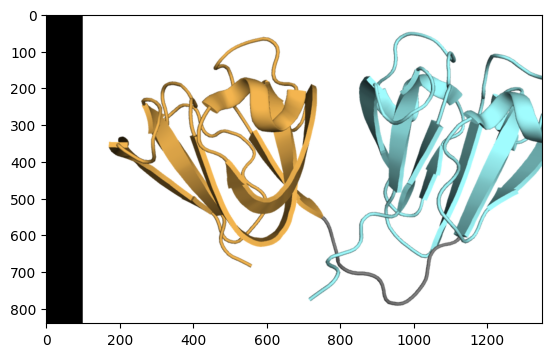

In [28]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can see some of the original image has been cut off. We can fix this by changing the output image size: <code>(cols + tx,rows + ty)</code>:


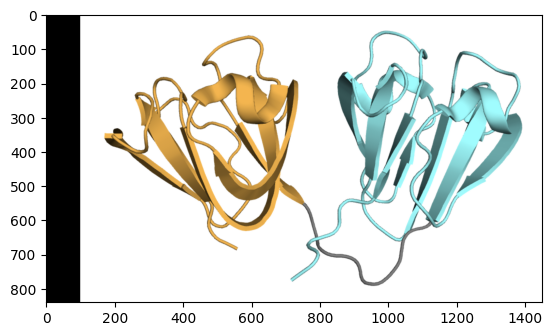

In [29]:
new_image = cv2.warpAffine(image2, M, (cols + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()



We can shift the image horizontally:


In [ ]:
tx = 0
ty = 50
M = np.float32([[1, 0, tx], [0, 1, ty]])
new_iamge = cv2.warpAffine(image2, M, (cols + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_iamge, cv2.COLOR_BGR2RGB))
plt.show()

## Rotation 


We can rotate an image by angle θ which is achieved by the Rotation Matrix <code>getRotationMatrix2D</code>.


<p><code>center</code>: Center of the rotation in the source image. We will only use the center of the image.</p>
<p><code>angle</code>: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).</p>
<p><code>scale</code>: Isotropic scale factor, in this course the value will be one.</p>


We can rotate our toy image by 45 degrees:


In [ ]:
theta = 45.0
M = cv2.getRotationMatrix2D(center=(3, 3), angle=theta, scale=1)
new_toy_image = cv2.warpAffine(toy_image, M, (6, 6))

In [ ]:
plot_image(toy_image, new_toy_image, title_1="Orignal", title_2="rotated image")

Looking at intensity values, we see that many values have been interpolated:


In [ ]:
new_toy_image 

We can perform the same operation on color images:


In [ ]:
cols, rows, _ = image2.shape

In [ ]:
M = cv2.getRotationMatrix2D(center=(cols // 2 - 1, rows // 2 - 1), angle=theta, scale=1)
new_image = cv2.warpAffine(image2, M, (cols, rows))

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

# Mathematical Operations 


## Array Operations 


We can perform array operations on an image; Using Python broadcasting, we can add a constant to each pixel's intensity value. 


In [ ]:
 new_image = image2 + 20

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can also multiply every pixel's intensity value by a constant value.


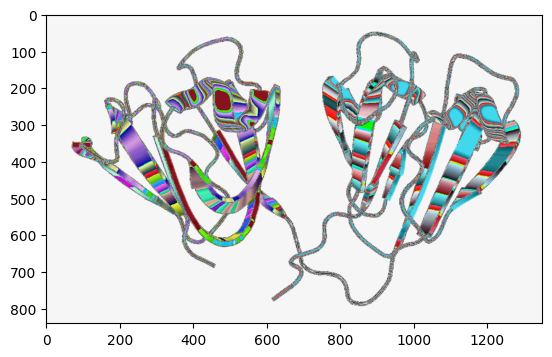

In [33]:
new_image = 10 * image2
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can add the elements of two arrays of equal shape. In this example, we generate an array of random noise with the same shape and data type as our image.


In [36]:
Noise = np.random.normal(0, 10, (rows, cols, 3)).astype(np.uint8)
Noise.shape


(840, 1350, 3)

We add the generated noise to the image and plot the result. We see the values that have corrupted the image:


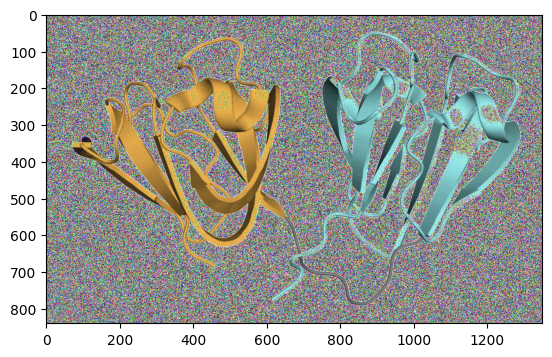

In [37]:
new_image = image2 + Noise

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

## False colouring

Sometimes, it’s useful to change how an image is displayed — for example, to highlight contrast or to make features easier to see. In scientific imaging, this is often called false colouring or applying a colour map.

To enhance visual contrast, we can apply a false colour map.
OpenCV has many built-in options such as COLORMAP_JET, COLORMAP_HOT, and COLORMAP_TURBO.

This maps pixel intensity values (dark → bright) to a colour gradient — for instance, blue for low values and red/yellow for high ones.
It’s especially helpful for displaying diffraction patterns or other intensity-based data.




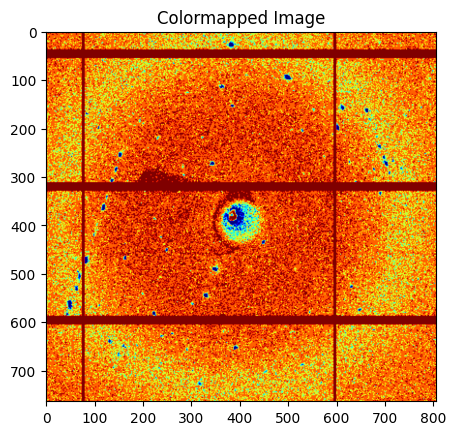

In [39]:
colored = cv2.applyColorMap(image, cv2.COLORMAP_JET)
plt.imshow(cv2.cvtColor(colored, cv2.COLOR_BGR2RGB))
plt.title('Colormapped Image')
plt.show()

You can also change the overall tone of the image by adjusting individual colour channels.
For example, adding more red can create a warm appearance:

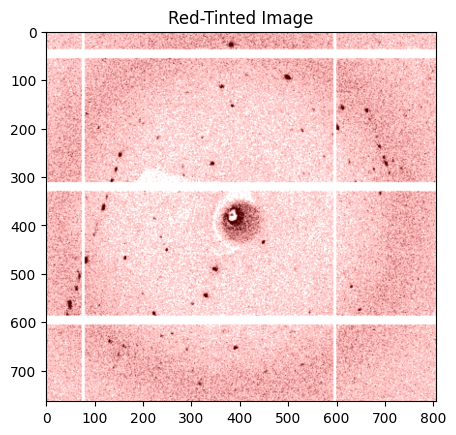

In [40]:
color_img = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
tinted = color_img.copy()
tinted[:, :, 2] = cv2.add(tinted[:, :, 2], 80)  # boost red channel
plt.imshow(cv2.cvtColor(tinted, cv2.COLOR_BGR2RGB))
plt.title('Red-Tinted Image')
plt.show()

Try changing which channel you boost (0=blue, 1=green, 2=red) to see how it affects the result.

In the cell below try to re-colour molecule.png (image2) using either a filter or boosting a colour channel and save the output.

You can find a full list of filters here:

https://docs.opencv.org/4.x/d3/d50/group__imgproc__colormap.html

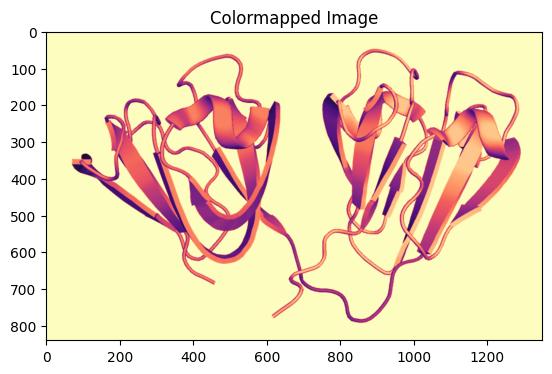

## Python image processing and feature recognition

We can use python to remove noise from images, this can be useful when trying to interpret data. Let's look at the diffraction pattern again.

The non-local means denoising (cv2.fastNlMeansDenoising) function removes noise whilst preserving edges in an image. 

Try changing the parameters to see how they affect the result:

- h: strength of luminance filter (higher = more smoothing)

- templateWindowSize: size of pixel neighborhood used to compare

- searchWindowSize: size of window to search for similar blocks



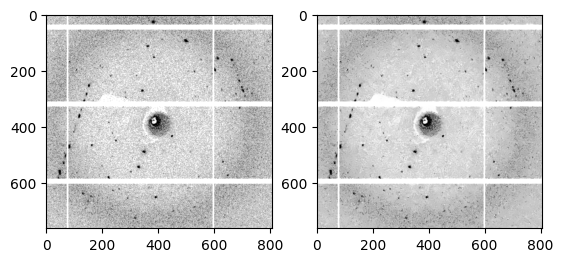

In [42]:
dst = cv2.fastNlMeansDenoising(image, None, h=15, templateWindowSize=7, searchWindowSize=21)
plt.subplot(121),plt.imshow(image)
plt.imshow(image, cmap='gray')
plt.subplot(122),plt.imshow(dst)
plt.imshow(dst, cmap='gray')
plt.show()

To process X-ray diffraction images we need to identify the position of each reflection (or spot) in the image. We can use computer vision tools to help identify the diffraction spots.

First we will convert the image to a binary representation where the dark spots are black and the lighter grey parts are white.

You may want to go back and change the dst filter strength so that only strong diffraction peaks are identified.

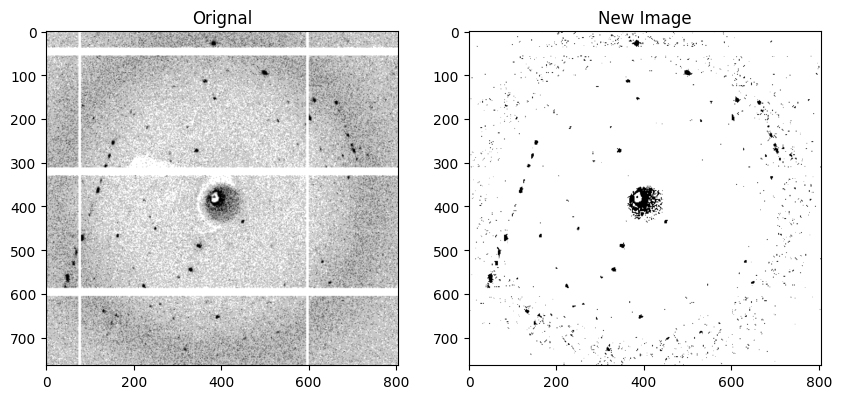

In [43]:
ret, thresh = cv2.threshold(dst, 127, 255, cv2.THRESH_BINARY)
plot_image(image, thresh)

Next we will use the *Hough Circle Transform*  to detect the spots. This alogirthm works by transforming points from the image space into a parameter space that represents potential circles. Each edge pixel "votes" for all possible circles that could pass through it, and peaks in this voting space correspond to likely circles in the original image.

The key parameters to tune are:

dp: The inverse ratio of the accumulator resolution — controls detection precision.

minDist: The minimum distance between detected circle centers — avoids multiple detections of the same feature.

param1: The higher threshold for edge detection (Canny filter).

param2: The threshold for circle detection — lower values make detection more sensitive but may increase false positives.

minRadius, maxRadius: The size range of circles to detect.

By experimenting with these parameters, you can accurately isolate circular structures even in noisy or complex datasets, making this method a powerful tool for image analysis in physics and materials science.

In [44]:
black_circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, dp=20, minDist=5, param1=10, param2=20, minRadius=4, maxRadius=50)


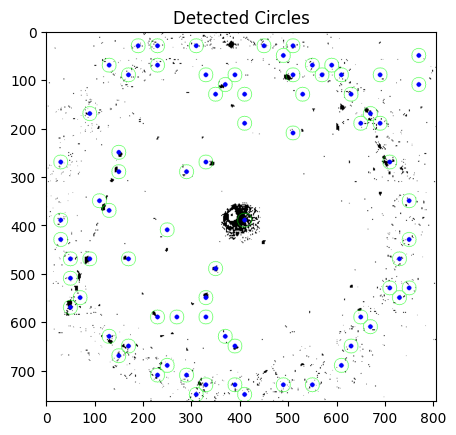

In [45]:
output = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

if black_circles is not None:
    black_circles = np.uint16(np.around(black_circles))
    for i in black_circles[0, :]:
        radius = i[2]
        center = (i[0], i[1])
        adjusted_radius = max(radius - (radius-2), 15)
        cv2.circle(output, (i[0], i[1]), 2, (0, 0, 250), 5)    # draw center point
        cv2.circle(output, center, adjusted_radius, (0, 255, 0), 1)

plt.imshow(output)
plt.title('Detected Circles')
plt.show()

Change the parameters until you find the optimal peak finding settings so that strong peaks are identified and noise is not included. 

Save the Detected Circles image.

In the cell below complete the code to print the number of peaks

In [47]:

num_peaks = black_circles.shape[1]  # number of circles detected
print(num_peaks)  #edit this line



77


And now we will create a data frame containing the peak co-ordinates.

In [53]:
peak_coords = []
for i in black_circles[0, :]:
    x, y, radius = i[0], i[1], i[2]
    peak_coords.append((x, y))  # only centers

df = pd.DataFrame(peak_coords, columns=['x', 'y']) #create a pandas data frame with the coordinates of each spot.
print(df.head()) #print a few lines of the data frame to check

     x    y
0  410  390
1   50  470
2  290  710
3  490   50
4  610  690


Let's find the intensity (pixel values) for each peak and add them to the data frame

In [54]:
intensities = [image[int(y), int(x)] for (x, y) in peak_coords]

df['intensity'] = intensities

print(df.head())



     x    y  intensity
0  410  390        131
1   50  470        193
2  290  710        199
3  490   50        255
4  610  690        156


Now we can export a column separated values (.csv) file containing the peak positions and intensitiy values

In [ ]:
df.to_csv('detected_peaks.csv', index=False)
print("\nPeak coordinates saved to 'detected_peaks.csv'")

Finally we will commit the final version of your code.

Since we have made a number of changes to the settings and saved some new files we will create a new •branch•. 

Branches allow you to develop features, fix bugs, or safely experiment with new ideas in a contained area of your repository.

To make a new branch you can type 

> git checkout -b test_branch

then

> git add .

> git commit -m "Describe what changed"

> git push origin test_branch

Check your github repository and make sure everything has been pushed properly.

You'll notice you now have two branches. 

You should now see the following:

<img src ="pull_request.png">

Click on compare & pull request. You should be able to see the differences between the two branches.

To merge them, create a pull request and then merge the pull request.

You can now delete the test branch. All of the changes should be visible in the main branch.

You may now add a short description of the code and edit the ReadMe file.